### Grad-CAM の実装

In [1]:
!pip install -q grad-cam==1.2.1
!pip install -q ttach

     |████████████████████████████████| 814 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from torchvision import transforms

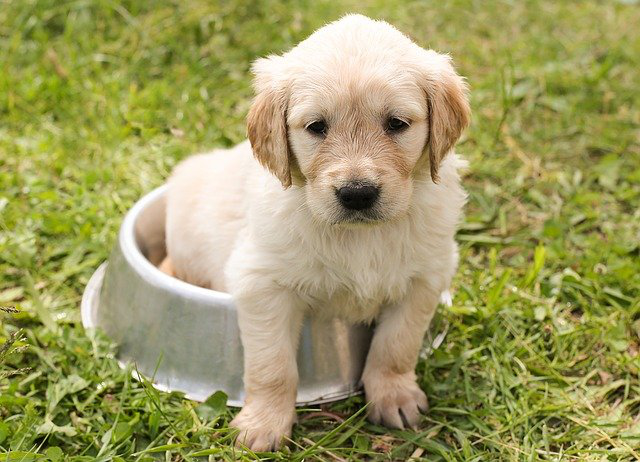

In [3]:
img = Image.open('/content/puppy-1207816_640.jpg')

img

In [4]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)

In [5]:
model = resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [6]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
model.layer4[-1]

Bottleneck(
  (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)

In [8]:
target_layer = model.layer4[-1]

# use_cuda=True で GPU を使用
cam = GradCAM(model=model, target_layer=target_layer, use_cuda=False)

In [9]:
grayscale_cam = cam(input_tensor=input_batch, target_category=None)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [10]:
grayscale_cam

array([[0.        , 0.        , 0.        , ..., 0.29692423, 0.29692423,
        0.29692423],
       [0.        , 0.        , 0.        , ..., 0.29692423, 0.29692423,
        0.29692423],
       [0.        , 0.        , 0.        , ..., 0.29692423, 0.29692423,
        0.29692423],
       ...,
       [0.02252304, 0.02252304, 0.02252304, ..., 0.06889142, 0.06889142,
        0.06889142],
       [0.02252304, 0.02252304, 0.02252304, ..., 0.06889142, 0.06889142,
        0.06889142],
       [0.02252304, 0.02252304, 0.02252304, ..., 0.06889142, 0.06889142,
        0.06889142]], dtype=float32)

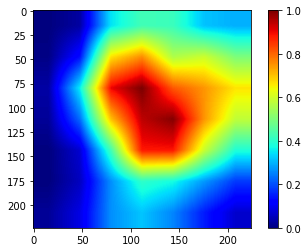

In [11]:
plt.imshow(grayscale_cam, cmap='jet')
plt.colorbar()

In [12]:
# input_tensor は pytorch のテンソルで (C, H, W), かつ 0 ~ 1 に正規化されている状態
# NumPy.ndarray に直し、(H, W, C) に形状変換
rgb_img = np.transpose(input_tensor.numpy(), (1, 2, 0)) 
rgb_img.shape, rgb_img.dtype

((224, 224, 3), dtype('float32'))

In [13]:
rgb_img.min(), rgb_img.max()

(0.0, 1.0)

In [14]:
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

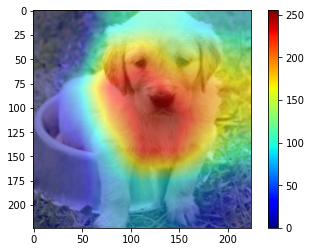

In [15]:
plt.imshow(visualization, cmap='jet')
plt.colorbar()